<a href="https://colab.research.google.com/github/guidsantos/analyzeCovidTotalCases/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas importadas 

In [1]:
import bs4 as bs
import requests as req
import html5lib as html

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#Coleta de Dados 

##Mineração de Dados do Artigo de casos de Covid-19

In [4]:
pagHtml = req.get("https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory").text
soup = bs.BeautifulSoup(pagHtml, 'html5lib')

In [5]:
#Mortes Acumulativas
div = soup.find('div', id="Monthly_cumulative_covid-19_death_totals_by_country")
table = div.find('table', id="thetable")
body = table.find('tbody')
data_cumulative_deaths = body.find_all('tr')

In [6]:
#Casos Totais
div2 = soup.find("div", id="covid-19-pandemic-data")
trs = div2.findAll('tr')
trs[2].get_text()

'\n\n\nUnited States[f]\n\n33,339,411\n\n596,943\n\nNo data\n\n[16]\n'

In [7]:
#Taxas de Morte
div3 = soup.find('div', id="covid-19-pandemic-death-rates")
table2 = div3.find('table', id="thetable")
body2 = table2.find('tbody')
data_death_rates = body2.find_all('tr')

##Mineração de Dados do IDH de cada país

In [8]:
pagHtml2 = req.get("https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idh-global.html").text
soup2 = bs.BeautifulSoup(pagHtml2, 'html5lib')
idhTable = soup2.find("tbody")
rows = idhTable.findAll('td')

In [9]:
rows.pop(148)
rows.pop(316)
rows.pop(433)

<td colspan="3">BAIXO DESENVOLVIMENTO HUMANO</td>

##Criando Data Frames
   

###Total de mortes de COVID-19 por país acumuladas mensalmente 

In [10]:
Lista = []
n = 0
while True:
  n += 1
  tds = data_cumulative_deaths[n].findAll('td')
  for i in range(len(tds)):
    tds_text = tds[i].getText()
    tds_text = tds_text.rstrip('\n')
    Lista.append(tds_text)
    Lista = [x for x in Lista if pd.isnull(x) == False]
  if n == (len(data_cumulative_deaths)-1):
    break

In [11]:
df_c19 = pd.DataFrame(np.array(Lista))
df_c19 = pd.DataFrame(np.array(Lista).reshape(200,13))
df_c19 = df_c19.rename(columns = {0: '2020', 1: 'Jan', 2: 'Fev', 3: 'Mar', 4:'Abr', 5:'Mai', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Out', 11:'Nov', 12:'Dez'})

In [12]:
months = ['Jan','Fev','Mar','Abr','Mai','Jun', 'Jul', 'Aug', 'Sep', 'Out', 'Nov', 'Dez']
for month in months:
  df_c19[month] = df_c19[month].str.replace(',', '')
  df_c19[month] = df_c19[month].astype(int)

In [13]:
df_c19_cumulative = df_c19.drop(index=1)
df_c19_cumulative = df_c19_cumulative.drop(index=2)
display(df_c19_cumulative)

,2020,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Aug,Sep,Out,Nov,Dez
0,World,1,259,2977,40598,224172,371166,508055,675060,848445,1010639,1192911,1465144
3,USA,0,0,0,2850,55337,102640,126573,151265,182162,204642,228185,264808
4,Brazil,0,0,0,159,5466,28834,58314,91263,120828,142921,159477,172833
5,India,0,0,0,38,1147,5394,17400,36511,65288,98678,122111,137621
6,Mexico,0,0,0,28,1732,9779,27121,46000,64158,77163,91289,105655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Fiji,0,0,0,0,0,0,0,1,2,2,2,2
196,Saint Lucia,0,0,0,0,0,0,0,0,0,0,0,2
197,British Virgin Islands,0,0,0,0,1,1,1,1,1,1,1,1
198,Burundi,0,0,0,0,1,1,1,1,1,1,1,1


In [14]:
coronaMundo = df_c19_cumulative[0:1]
coronaMundo.drop(axis=0, columns='2020')

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Aug,Sep,Out,Nov,Dez
0,1,259,2977,40598,224172,371166,508055,675060,848445,1010639,1192911,1465144


###Casos Totais Covid19


In [15]:
trsValues = []
for tr in trs:
    trText = tr.get_text()
    trText = trText.replace(',', '.')
    trText2 = trText.replace('\n\n\n', '')  
    trText3 = trText2.replace('\n\n', ',')
    trText4 = trText3.replace('\n', '')
    trText5 = trText4.replace(trText4[trText4.find("["):trText4.find("]")+1], '').strip()
    trTextList = trText5.split(',') 
    trsValues.append(trTextList)

In [16]:
location = []
cases = []
deaths = []
recov = []

for x in range(len(trsValues)-3):
   location.append(trsValues[x+1][0])
   cases.append(trsValues[x+1][1])
   deaths.append(trsValues[x+1][2])
   recov.append(trsValues[x+1][3])

In [17]:
df_casos_totais = pd.DataFrame(np.column_stack([location, cases, deaths,recov ]), 
                               columns=['Location', 'Cases', 'Deaths', 'Recovery'])

In [18]:
display(df_casos_totais)

,Location,Cases,Deaths,Recovery
0,World,167.951.168,3.488.242,No data
1,United States,33.339.411,596.943,No data
2,India,27.157.795,311.388,24.350.816
3,Brazil,16.194.209,452.031,14.648.332
4,France,5.621.696,109.052,No data
...,...,...,...,...
237,Samoa,4,0,2
238,Vanuatu,3,0,3
239,Kiribati,2,0,0
240,Federated States of Micronesia,1,0,1


###Pandemia Covid19 Taxas de Morte

In [19]:
Lista2 = []
n = 0
while True:
  n += 1
  tds = data_death_rates[n].findAll('td')
  for i in range(len(tds)):
    tds_text = tds[i].getText()
    tds_text = tds_text.rstrip('\n')
    tds_text = tds_text.replace('\xa0','')
    tds_text = tds_text.replace(',','')
    tds_text = tds_text.replace('%','')
    Lista2.append(tds_text)
    Lista2 = [x for x in Lista2 if pd.isnull(x) == False]
  if n == (len(data_death_rates)-1):
    break

In [20]:
df_c19_death_rates = pd.DataFrame(np.array(Lista2))
df_c19_death_rates = pd.DataFrame(np.array(Lista2).reshape(179,5))
df_c19_death_rates = df_c19_death_rates.rename(columns = {0: 'Paises', 1: 'Total Casos', 2: 'Total Mortes', 3: 'Letalidade', 4:'Mortes/100.000'})

df_c19_death_rates['Total Casos'] = df_c19_death_rates['Total Casos'].astype(int)
df_c19_death_rates['Total Mortes'] = df_c19_death_rates['Total Mortes'].astype(int)
df_c19_death_rates['Mortes/100.000'] = df_c19_death_rates['Mortes/100.000'].astype(float)
df_c19_death_rates['Letalidade'] = df_c19_death_rates['Letalidade'].astype(float)

print(display(df_c19_death_rates))

,Paises,Total Casos,Total Mortes,Letalidade,Mortes/100.000
0,Hungary,802510,29581,3.7,302.78
1,Czech Republic,1658778,30041,1.8,281.55
2,Bosnia and Herzegovina,203513,9168,4.5,277.73
3,San Marino,5089,90,1.8,265.80
4,North Macedonia,155071,5342,3.4,256.40
...,...,...,...,...,...
174,Taiwan,5456,35,0.6,0.15
175,Vietnam,5931,44,0.7,0.05
176,Burundi,4568,6,0.1,0.05
177,Tanzania,509,21,4.1,0.04


None


###IDH's de todos países

In [21]:
rows_filtered = []
x = 0
row_n = 1
row = []
for td in rows[1:]:
    if row_n == 447:
        break
    if row_n < 447:
        td_replace = str(td).replace('<td>', '')
        td_replace = td_replace.replace(',','.')
        td_replace = td_replace.replace('</td>', '')
        row.append(td_replace)
        if x < 3:
            x += 1
        if x == 3:
            rows_filtered.append(row)
            row = []
            x = 0
    if row_n == 147 | 317 :
      print(td)
    row_n +=1  
rows_filtered[-10:]

[['139', 'Zâmbia', '0.586'],
 ['140', 'Gana', '0.579'],
 ['141', 'Laos. República Democrática Popular do', '0.575'],
 ['142', 'Bangladesh', '0.570'],
 ['143', 'Camboja', '0.555'],
 ['143', 'São Tomé e Príncipe', '0.555'],
 ['145', 'Quênia', '0.548'],
 ['145', 'Nepal', '0.548'],
 ['147', 'Paquistão', '0.538'],
 ['148', 'Mianmar', '0.536']]

In [22]:
for row in rows_filtered:
  row[2] = float(row[2])

In [23]:
df_idh = pd.DataFrame(rows_filtered,
                         columns=['Pos','Pais','IDH'])

In [24]:
display(df_idh)

,Pos,Pais,IDH
0,1,Noruega,0.944
1,2,Austrália,0.935
2,3,Suíça,0.930
3,4,Dinamarca,0.923
4,5,Países Baixos,0.922
...,...,...,...
143,143,São Tomé e Príncipe,0.555
144,145,Quênia,0.548
145,145,Nepal,0.548
146,147,Paquistão,0.538


#Filtrando Dados


In [25]:
def filterDf(dataFrame, column, values):
    return dataFrame.loc[dataFrame[column].isin(values)]

In [26]:
#Filtro paises selecionados 
paises_br = ['França','Índia','Estados Unidos','Alemanha','Itália','Brasil','Colômbia','Federação Russa', 'México','Reino Unido']
paises_en = ['France', 'India','United States', 'Germany', 'Italy', 'Brazil', 'Colombia', 'Russia', 'Mexico', 'United Kingdom']

In [27]:
df_death_rates_filtered = filterDf(df_c19_death_rates,'Paises', paises_en)
df_death_rates_filtered.shape

(10, 5)

In [28]:
df_idh_filtered = filterDf(df_idh,'Pais', paises_br)
df_idh_filtered = df_idh_filtered.drop('Pos', axis=1)
df_idh_filtered.shape

(10, 2)

In [29]:
lista_idhs = list(df_idh_filtered.sort_values(['IDH'],ascending=False)['IDH'])

In [30]:
df_rates_ordenado = df_death_rates_filtered.sort_values(['Mortes/100.000'], ascending=False)

In [31]:
sns.set_theme(style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
df_death_rates_filtered = df_death_rates_filtered.sort_values(['Total Mortes'], ascending=False)

In [32]:
df_death_rates_filtered['Paises']

17     United States
10            Brazil
93             India
18            Mexico
16    United Kingdom
13             Italy
58            Russia
24            France
45           Germany
19          Colombia
Name: Paises, dtype: object

In [33]:
df_morte_mes = pd.DataFrame({"Jan":[1], "Fev":[258], "Mar":[2718], "Abr":[37621], "Mai":[183574], "Jun":[146994], "Jul":[136886], "Aug":[167005], "Sep":[173385], "Out":[162194], "Nov":[182272], "Dez":[272233]})
df_morte_mes
Numero = [1,258,2718,37621,183574,146994,136886,167005,173385,162194,182272,272233]

##Visualização dos dados

###Configurações globais dos gráficos 

In [34]:
sns.set()
sns.set_style('white')

In [40]:
parameters = {
    'axes.titlesize' : 25,
    'axes.labelsize' : 20,
    'font.weight': 'light',
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
}
plt.rcParams.update(parameters)

###Gráficos

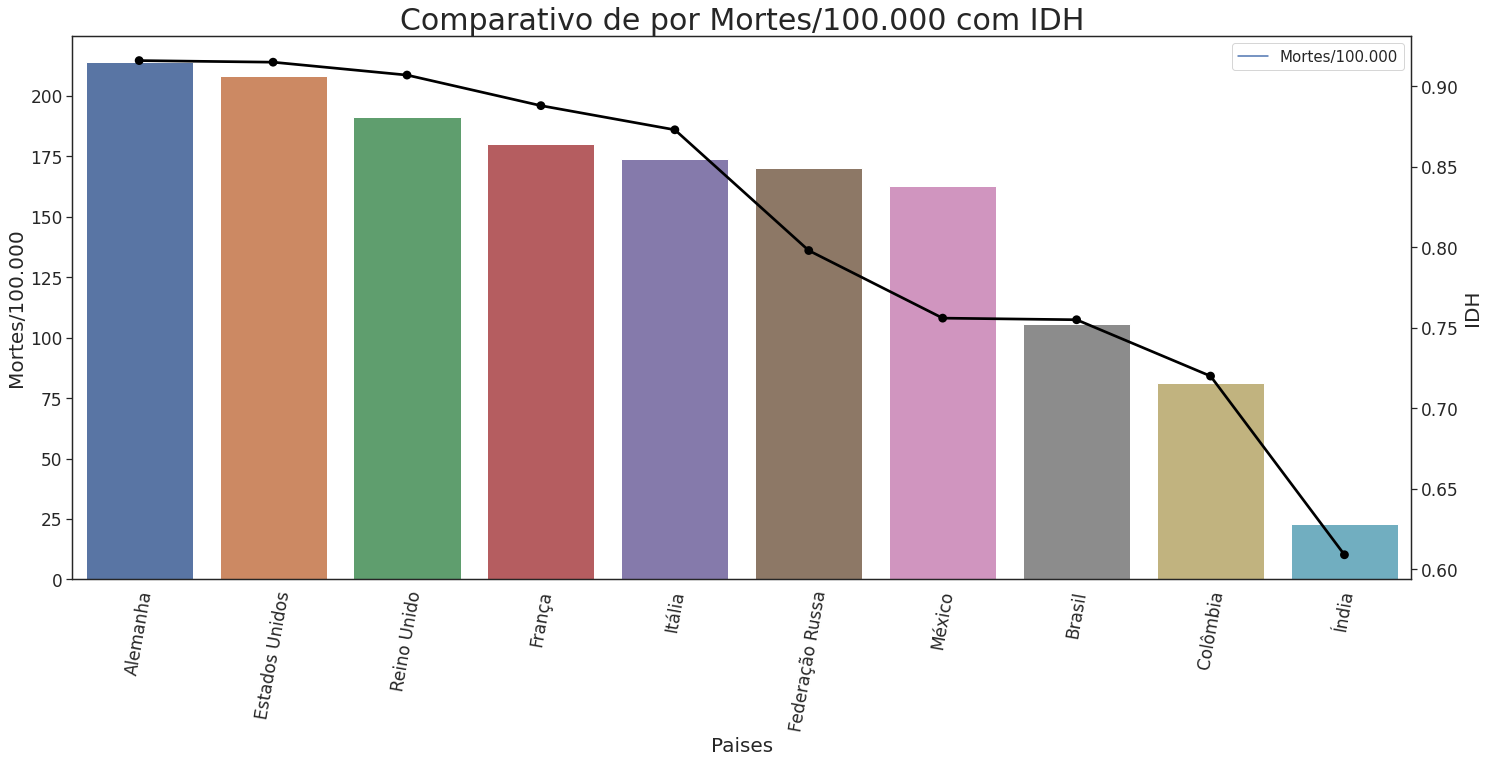

In [56]:
plt.figure(figsize=(24,10))
plt.title('Comparativo de por Mortes/100.000 com IDH', fontsize=30)
sns.barplot(x='Paises', y='Mortes/100.000', data=df_rates_ordenado)
plt.xticks(rotation = 80)
plt.twinx()
sns.lineplot(x='IDH', data=df_idh_filtered,label='Mortes/100.000')
plt.legend(fontsize=15)
sns.pointplot(y='IDH', x='Pais', data=df_idh_filtered, color='black')
plt.show()

Nesse comparativo é possível observar que quanto maior a quantidade de mortes/100.000 maior o IDH, isso pode acontecer devido a concentração urbana ser maior em países com IDH alto, facilitando a transmissão nesses territórios, outro fator é a expectativa de vida alta que faz esses países terem uma população idosa maior, que são as pessoas mais afetadas pelo vírus. Também existem alguns outliers como a Índia que possui uma superpopulação e IDH baixo, isso causa uma ineficiência no registro de casos, então estaticamente é melhor não o considerar. 

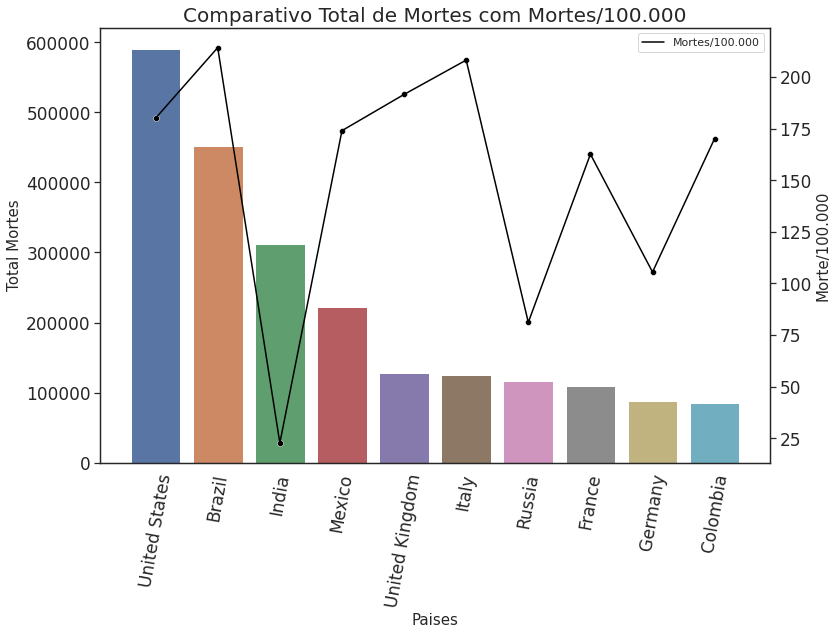

In [58]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=df_death_rates_filtered, x='Paises', y='Total Mortes', ax=ax)
plt.ylabel('Total Mortes', fontsize=15)
plt.xlabel('Paises', fontsize=15)
plt.xticks(rotation = 80)
plt.twinx()
sns.lineplot(data=df_death_rates_filtered, x='Paises', y='Mortes/100.000', color='black', label='Mortes/100.000')
plt.ylabel('Morte/100.000', fontsize=15)
sns.scatterplot(data=df_death_rates_filtered, x='Paises', y='Mortes/100.000', color='black')
plt.title('Comparativo Total de Mortes com Mortes/100.000', fontsize=20)
plt.show()


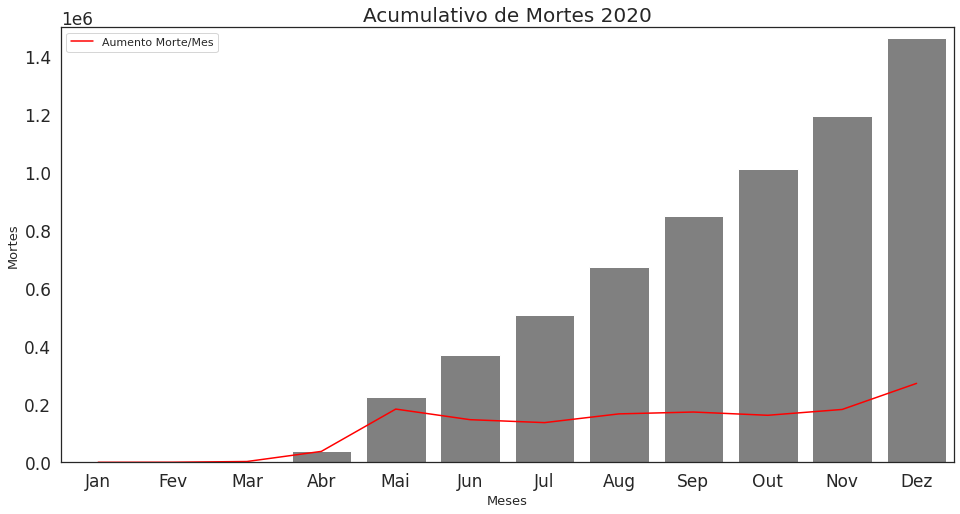

In [38]:
plt.figure(figsize=(16,8))
sns.lineplot(x=months, y=Numero, color='red', label='Aumento Morte/Mes')
sns.barplot(data=coronaMundo,color='gray')
plt.ylim(0, 1500000)
plt.xlabel('Meses', fontsize=13)
plt.ylabel('Mortes', fontsize=13)
plt.title('Acumulativo de Mortes 2020', fontsize=20)
plt.legend()
plt.show()